# Project 1: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 1 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
df = pd.read_csv("movies_complete.csv")

In [2]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

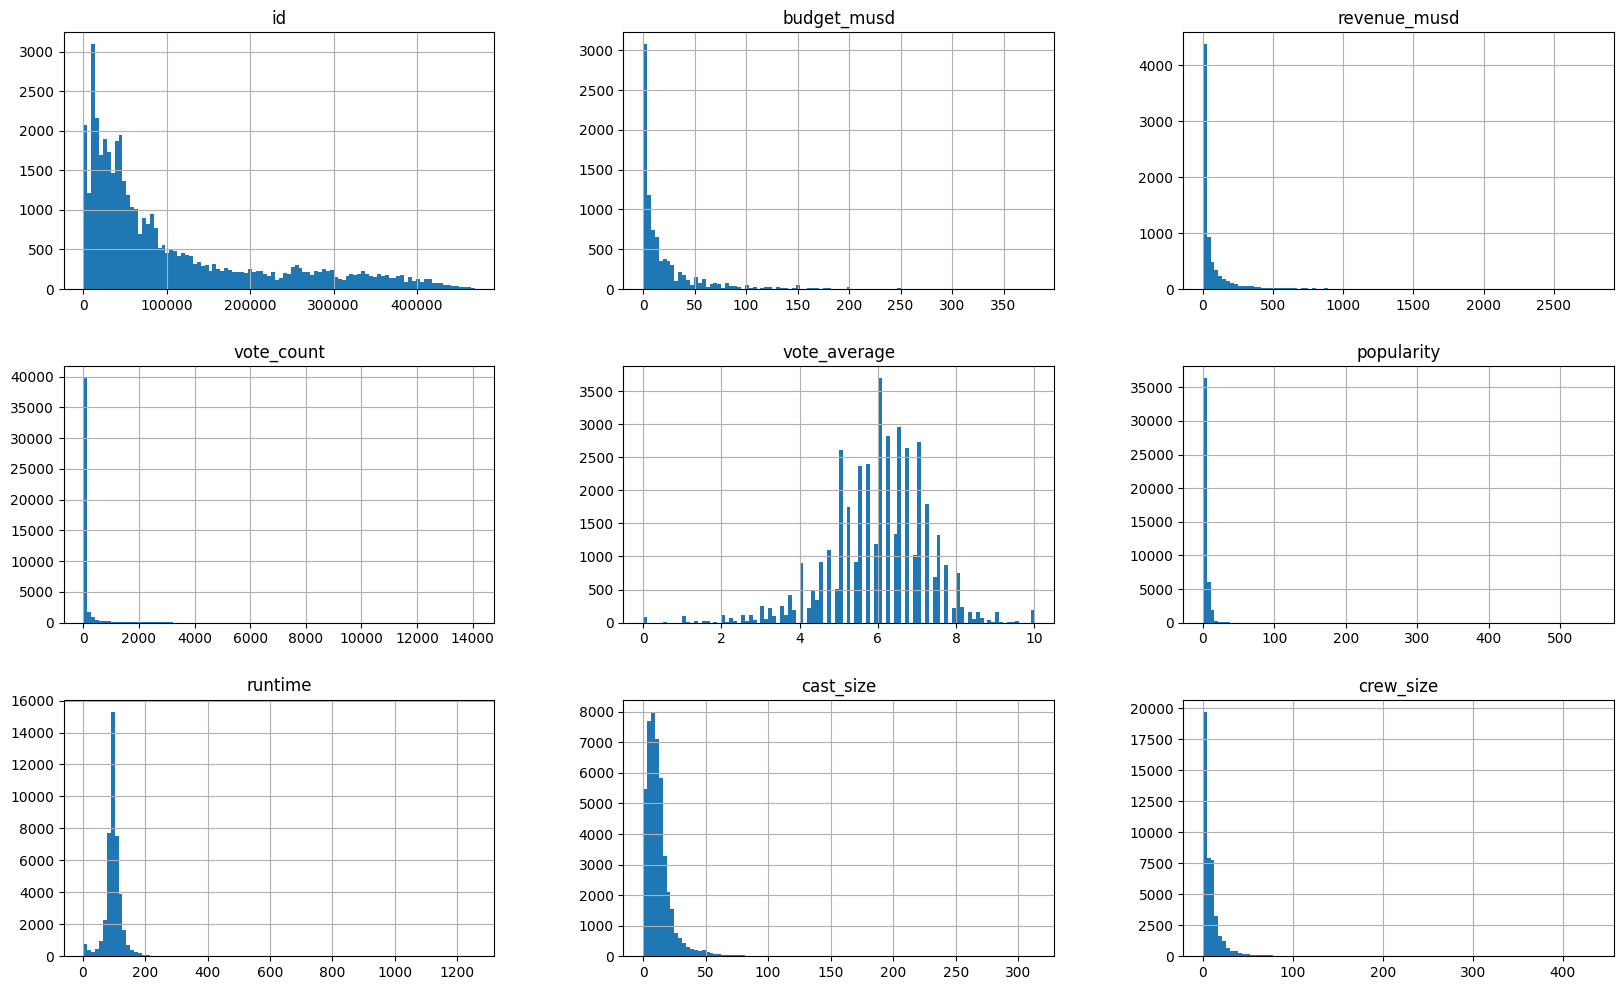

In [3]:
df.hist(figsize=(20,12), bins = 100);

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

In [4]:
df_best = df.loc[:,['id', 'title','budget_musd',
       'revenue_musd','vote_count', 'vote_average', 'popularity', 'poster_path']].copy()
df_best.set_index("id",inplace = True)
df_best.fillna(0, inplace = True)
df_best["profit"] = df_best["revenue_musd"].sub(df_best["budget_musd"])
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 862 to 461257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         44691 non-null  object 
 1   budget_musd   44691 non-null  float64
 2   revenue_musd  44691 non-null  float64
 3   vote_count    44691 non-null  float64
 4   vote_average  44691 non-null  float64
 5   popularity    44691 non-null  float64
 6   poster_path   44691 non-null  object 
 7   profit        44691 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.1+ MB


In [5]:
def highest(by, df,asd):
    df_sort = df.sort_values(by = by, ascending = asd).copy()
    return df_sort

__Movies Top 5 - Highest Revenue__

In [6]:
highest("revenue_musd", df_best, False).head(5)

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,poster_path,profit
id,,,,,,,,
19995,Avatar,237.0,2787.965087,12114.0,7.2,185.070892,<img src='http://image.tmdb.org/t/p/w185//btnl...,2550.965087
140607,Star Wars: The Force Awakens,245.0,2068.223624,7993.0,7.5,31.626013,<img src='http://image.tmdb.org/t/p/w185//9rd0...,1823.223624
597,Titanic,200.0,1845.034188,7770.0,7.5,26.889070,<img src='http://image.tmdb.org/t/p/w185//9xjZ...,1645.034188
24428,The Avengers,220.0,1519.557910,12000.0,7.4,89.887648,<img src='http://image.tmdb.org/t/p/w185//RYMX...,1299.557910
135397,Jurassic World,150.0,1513.528810,8842.0,6.5,32.790475,<img src='http://image.tmdb.org/t/p/w185//rhr4...,1363.528810


__Movies Top 5 - Highest Budget__

In [7]:
highest("budget_musd", df_best, False).head(5)

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,poster_path,profit
id,,,,,,,,
1865,Pirates of the Caribbean: On Stranger Tides,380.0,1045.713802,5068.0,6.4,27.887720,<img src='http://image.tmdb.org/t/p/w185//keGf...,665.713802
285,Pirates of the Caribbean: At World's End,300.0,961.000000,4627.0,6.9,31.363664,<img src='http://image.tmdb.org/t/p/w185//oVh3...,661.000000
99861,Avengers: Age of Ultron,280.0,1405.403694,6908.0,7.3,37.379420,<img src='http://image.tmdb.org/t/p/w185//4ssD...,1125.403694
1452,Superman Returns,270.0,391.081192,1429.0,5.4,13.284712,<img src='http://image.tmdb.org/t/p/w185//6ZYO...,121.081192
335988,Transformers: The Last Knight,260.0,604.942143,1440.0,6.2,39.186819,<img src='http://image.tmdb.org/t/p/w185//s5HQ...,344.942143


__Movies Top 5 - Highest Profit__

In [8]:
highest("profit", df_best, False).head(5)

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,poster_path,profit
id,,,,,,,,
19995,Avatar,237.0,2787.965087,12114.0,7.2,185.070892,<img src='http://image.tmdb.org/t/p/w185//btnl...,2550.965087
140607,Star Wars: The Force Awakens,245.0,2068.223624,7993.0,7.5,31.626013,<img src='http://image.tmdb.org/t/p/w185//9rd0...,1823.223624
597,Titanic,200.0,1845.034188,7770.0,7.5,26.889070,<img src='http://image.tmdb.org/t/p/w185//9xjZ...,1645.034188
135397,Jurassic World,150.0,1513.528810,8842.0,6.5,32.790475,<img src='http://image.tmdb.org/t/p/w185//rhr4...,1363.528810
168259,Furious 7,190.0,1506.249360,4253.0,7.3,27.275687,<img src='http://image.tmdb.org/t/p/w185//d9jZ...,1316.249360


__Movies Top 5 - Lowest Profit__

In [9]:
highest("profit", df_best, True).head(5)

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,poster_path,profit
id,,,,,,,,
57201,The Lone Ranger,255.0,89.28991,2361.0,5.9,12.729104,<img src='http://image.tmdb.org/t/p/w185//b2je...,-165.71009
350499,Pokémon the Movie: Hoopa and the Clash of Ages,150.0,0.00000,39.0,6.2,3.176182,<img src='http://image.tmdb.org/t/p/w185//ujLI...,-150.00000
7978,The Wolfman,150.0,0.00000,562.0,5.5,9.297209,<img src='http://image.tmdb.org/t/p/w185//a5DT...,-150.00000
331214,Band of Brothers,125.0,0.00000,725.0,8.2,7.903731,<img src='http://image.tmdb.org/t/p/w185//yRXT...,-125.00000
189197,The Pacific,120.0,0.00000,318.0,7.9,6.092242,<img src='http://image.tmdb.org/t/p/w185//xV7F...,-120.00000


__Movies Top 5 - Highest ROI__

In [10]:
def highest_with_cre(by,cre_col,minx,df,asd):
    df_sort = df.loc[df[cre_col] > minx].sort_values(by = by, ascending = asd).copy()
    return df_sort

highest_with_cre("vote_average", "vote_count", 10 ,df_best, False).head(5)

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,poster_path,profit
id,,,,,,,,
420714,Planet Earth II,0.0,0.0,50.0,9.5,5.651997,<img src='http://image.tmdb.org/t/p/w185//gTvA...,0.0
26397,The Civil War,0.0,0.0,15.0,9.2,3.431403,<img src='http://image.tmdb.org/t/p/w185//r4sW...,0.0
19404,Dilwale Dulhania Le Jayenge,13.2,100.0,661.0,9.1,34.457024,<img src='http://image.tmdb.org/t/p/w185//2CAL...,86.8
409926,Cosmos,0.0,0.0,41.0,9.1,0.282584,<img src='http://image.tmdb.org/t/p/w185//mYrn...,0.0
44645,Bruce Lee: The Legend,0.0,0.0,19.0,8.9,3.475895,<img src='http://image.tmdb.org/t/p/w185//fdD3...,0.0


__Movies Top 5 - Lowest ROI__

In [11]:
highest_with_cre("vote_average", "vote_count", 10 ,df_best, True).head(5)

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,poster_path,profit
id,,,,,,,,
398818,Call Me by Your Name,4.696772,0.0,18.0,0.0,4.300874,<img src='http://image.tmdb.org/t/p/w185//tcNn...,-4.696772
13383,Santa Claus,0.000000,0.0,12.0,1.6,1.248299,<img src='http://image.tmdb.org/t/p/w185//xurQ...,0.000000
22727,The Beast of Yucca Flats,0.000000,0.0,18.0,1.6,0.930790,<img src='http://image.tmdb.org/t/p/w185//cehv...,0.000000
295884,Saving Christmas,0.000000,0.0,25.0,1.7,1.231644,<img src='http://image.tmdb.org/t/p/w185//6MLS...,0.000000
31258,The Wild World of Batwoman,0.000000,0.0,12.0,1.8,0.455183,<img src='http://image.tmdb.org/t/p/w185//z7Zg...,0.000000


__Movies Top 5 - Most Votes__

In [12]:
highest("vote_count",df_best, False).head(5)

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,poster_path,profit
id,,,,,,,,
27205,Inception,160.0,825.532764,14075.0,8.1,29.108149,<img src='http://image.tmdb.org/t/p/w185//9gk7...,665.532764
155,The Dark Knight,185.0,1004.558444,12269.0,8.3,123.167259,<img src='http://image.tmdb.org/t/p/w185//qJ2t...,819.558444
19995,Avatar,237.0,2787.965087,12114.0,7.2,185.070892,<img src='http://image.tmdb.org/t/p/w185//btnl...,2550.965087
24428,The Avengers,220.0,1519.557910,12000.0,7.4,89.887648,<img src='http://image.tmdb.org/t/p/w185//RYMX...,1299.557910
293660,Deadpool,58.0,783.112979,11444.0,7.4,187.860492,<img src='http://image.tmdb.org/t/p/w185//fSRb...,725.112979


__Movies Top 5 - Most Popular__

In [13]:
highest("popularity",df_best, False).head(5)

,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,poster_path,profit
id,,,,,,,,
211672,Minions,74.0,1156.730962,4729.0,6.4,547.488298,<img src='http://image.tmdb.org/t/p/w185//tMaG...,1082.730962
297762,Wonder Woman,149.0,820.580447,5025.0,7.2,294.337037,<img src='http://image.tmdb.org/t/p/w185//gfJG...,671.580447
321612,Beauty and the Beast,160.0,1262.886337,5530.0,6.8,287.253654,<img src='http://image.tmdb.org/t/p/w185//tWqi...,1102.886337
339403,Baby Driver,34.0,224.511319,2083.0,7.2,228.032744,<img src='http://image.tmdb.org/t/p/w185//rmnQ...,190.511319
177572,Big Hero 6,165.0,652.105443,6289.0,7.8,213.849907,<img src='http://image.tmdb.org/t/p/w185//xozr...,487.105443


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [14]:
mask = df["genres"].str.contains("Science Fiction") & df["cast"].str.contains("Bruce Willis") & df["genres"].str.contains("Action")

In [15]:
HTML(df.loc[mask, ["title","poster_path","vote_average"]].sort_values(by="vote_average",ascending = False).to_html(escape = False))

,title,poster_path,vote_average
1448,The Fifth Element,,7.3
19218,Looper,,6.6
1786,Armageddon,,6.5
14135,Surrogates,,5.9
20333,G.I. Joe: Retaliation,,5.4
27619,Vice,,4.1


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [16]:
mask = df["cast"].str.contains("Uma Thurman") & df["cast"].str.contains("Quentin Tarantino")
df[mask].sort_values(by="runtime")

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
291,680,Pulp Fiction,Just because you are a character doesn't mean ...,1994-09-10,Thriller|Crime,NaN,en,8.0,213.928762,Miramax Films|A Band Apart|Jersey Films,...,8.3,140.950236,154.0,"A burger-loving hit man, his philosophical par...",English|Español|Français,<img src='http://image.tmdb.org/t/p/w185//d5iI...,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,54,87,Quentin Tarantino


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [17]:
mask =df["production_companies"].str.contains("Pixar") & df["release_date"].between("2010-01-01","2015-12-31")
mask.fillna(False,inplace = True)
HTML(df.loc[mask,"id title revenue_musd poster_path".split()].sort_values(by = "revenue_musd").set_index("id").to_html(escape = False))

,title,revenue_musd,poster_path
id,,,
105864,The Good Dinosaur,331.926147,
62177,Brave,538.983207,
49013,Cars 2,559.852396,
62211,Monsters University,743.559607,
150540,Inside Out,857.611174,
10193,Toy Story 3,1066.969703,
40619,Day & Night,NaN,
200481,The Blue Umbrella,NaN,
213121,Toy Story of Terror!,NaN,


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [18]:
mask = df["genres"].str.contains("Action") | df["genres"].str.contains("Thriller") & (df["vote_average"] >= 7.5)
HTML(df.loc[mask,"id title release_date poster_path".split()].sort_values(by = "release_date").to_html(escape = False))

,id,title,release_date,poster_path
34605,33318,Men Boxing,1891-04-30,
44675,49280,The One-Man Band,1900-01-01,
43994,44341,Life of an American Fireman,1903-01-21,
11340,5698,The Great Train Robbery,1903-12-01,
42446,20105,The Story of the Kelly Gang,1906-12-26,
23909,127105,The Lonely Villa,1909-06-10,
37497,125673,The Battle at Elderbush Gulch,1913-01-01,
17809,133123,The Last Days of Pompeii,1913-08-13,
13733,29082,Les vampires,1915-11-13,
12916,30266,"20,000 Leagues Under the Sea",1916-12-24,


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

__Franchise vs. Stand-alone: Average Revenue__

In [42]:
df_fran = df.copy()
df_fran["Fran"] = df_fran["belongs_to_collection"].notna()
df_fran.columns

df_check_fran = df_fran.groupby("Fran").mean(numeric_only = True).loc[:,"budget_musd revenue_musd vote_count vote_average popularity".split()]
df_check_fran

,budget_musd,revenue_musd,vote_count,vote_average,popularity
Fran,,,,,
False,18.047741,44.742814,78.289550,6.008787,2.592726
True,38.319847,165.708193,412.387856,5.956806,6.245051


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [46]:
df_company = df[df["belongs_to_collection"].notna()].fillna(0)
df_company.groupby("belongs_to_collection").agg({
    "title":"count", "budget_musd":"sum","budget_musd":"mean","revenue_musd":"sum","revenue_musd":"mean","vote_average":"mean"
}).nlargest(20,"title")

,title,budget_musd,revenue_musd,vote_average
belongs_to_collection,,,,
The Bowery Boys,29,0.000000,0.000000,3.682759
Totò Collection,27,0.000000,0.000000,6.837037
James Bond Collection,26,59.217308,273.345009,6.338462
Zatôichi: The Blind Swordsman,26,0.000000,0.000000,6.403846
The Carry On Collection,25,0.000000,0.000000,6.168000
Charlie Chan (Sidney Toler) Collection,21,0.000000,0.000000,6.609524
Pokémon Collection,20,12.536020,30.093298,6.055000
Godzilla (Showa) Collection,16,0.175625,0.000000,5.975000
Charlie Chan (Warner Oland) Collection,15,0.000000,0.000000,5.326667


## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [50]:
df.groupby("director").agg({"title":"count", "revenue_musd":"sum","vote_average":"mean"}).nlargest(20,"title")

,title,revenue_musd,vote_average
director,,,
John Ford,66,85.170757,6.381818
Michael Curtiz,65,37.817500,5.998246
Werner Herzog,54,24.572580,6.805556
Alfred Hitchcock,53,250.107584,6.639623
Georges Méliès,49,0.000000,5.934694
Woody Allen,49,993.970588,6.691837
Jean-Luc Godard,46,0.867433,6.804348
Sidney Lumet,46,294.522734,6.576744
Charlie Chaplin,44,26.519181,6.540909


### Most Successfull actor

In [27]:
cast = df["cast"].str.split("|",expand = True)

In [28]:
cast = cast.stack()

In [30]:
cast = cast.reset_index(level=1, drop = True)
cast

0                Tom Hanks
0                Tim Allen
0              Don Rickles
0               Jim Varney
0            Wallace Shawn
               ...        
44689     Iwan Mosschuchin
44689    Nathalie Lissenko
44689         Pavel Pavlov
44689    Aleksandr Chabrov
44689          Vera Orlova
Length: 557703, dtype: object

In [31]:
cast = cast.to_frame()
cast

,0
0,Tom Hanks
0,Tim Allen
0,Don Rickles
0,Jim Varney
0,Wallace Shawn
...,...
44689,Iwan Mosschuchin
44689,Nathalie Lissenko
44689,Pavel Pavlov
44689,Aleksandr Chabrov


In [32]:
cast.columns = ["Actor"]

In [34]:
cast

,Actor
0,Tom Hanks
0,Tim Allen
0,Don Rickles
0,Jim Varney
0,Wallace Shawn
...,...
44689,Iwan Mosschuchin
44689,Nathalie Lissenko
44689,Pavel Pavlov
44689,Aleksandr Chabrov


In [40]:
cast = cast.merge(df["title budget_musd revenue_musd vote_average".split()],how = "left", left_index=True, right_index=True).dropna()
cast

,Actor,title,budget_musd,revenue_musd,vote_average
0,Tom Hanks,Toy Story,30.0,373.554033,7.7
0,Tim Allen,Toy Story,30.0,373.554033,7.7
0,Don Rickles,Toy Story,30.0,373.554033,7.7
0,Jim Varney,Toy Story,30.0,373.554033,7.7
0,Wallace Shawn,Toy Story,30.0,373.554033,7.7
...,...,...,...,...,...
44638,Andrey Kuzichyov,Pro Lyuboff,2.0,1.268793,4.0
44648,Vladimir Turchinsky,Antidur,5.0,1.413000,1.0
44648,Dmitriy Dyuzhev,Antidur,5.0,1.413000,1.0
44648,Tatyana Dogileva,Antidur,5.0,1.413000,1.0


In [45]:
cast.groupby("Actor").agg({
    "title":"count", "budget_musd":"sum","budget_musd":"mean","revenue_musd":"sum","revenue_musd":"mean"
})

,title,budget_musd,revenue_musd
Actor,,,
Frank Nagai,1,6.000000,42.000000
Larry Mullen Jr.,1,15.000000,22.730842
"""Weird Al"" Yankovic",3,19.000000,56.436747
'Jeeva' Ravi,1,0.620000,1.400000
'Sister' Carol East,1,18.000000,41.325328
...,...,...,...
楊凱凱,1,35.000000,83.061158
薛立方,1,4.531653,84.552250
許淑嬪,2,35.000000,83.061158
